# SVM（支持向量机）

SVM既可以解决回归问题，又可以解决分类问题。   
SVM ：以二分类为例，找到一个决策边界，使其距离二类点的距离尽可能的大。即，与决策边界平行、过距离决策边界最近的二类点的直线组成的区域之间的间隔尽可能的大。

## svm分类

以二分类为例  
1. 线性可分 ：  
在二维平面中，存在一条直线能够将两类数据分离开；在高维空间中，存在一个超平面能够将两类数据分离开  
    
2. 支持向量 ：  
距离决策边界最近的二类点

3. 硬间隔 ：  
线性可分的支持向量机的间隔

4. 软间隔 ：  
线性不可分的支持向量机的间隔

### 硬间隔

设分离超平面为：$$W^Tx+b=0$$
其中$W^T$ 为方向，b 为偏置项


假设超平面能将训练样本正确地分类，即对于训练样本 $(x_i,y_i)$ ，满足以下公式：


\begin{cases}   W^Tx_i+b \geq +1& y_i= +1 \\  W^T x_i+b \leq -1& y_i= -1\end{cases}


实际上该公式等价于；$$y_i(W^T x_i+b)≥+1$$

距离超平面最近的这几个样本点满足$y_i(W^T x_i+b)=1$，它们被称为**“支持向量”**。虚线称为边界，两条虚线间的距离称为 **间隔（margin）**。

关于间隔的计算：它就等于两个异类支持向量的差在 W 方向上的投影

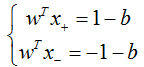

故$\gamma=\frac{（\overrightarrow x_+-\overrightarrow x_-）\overrightarrow W^T}{||W||}=\frac{1-b+1+b}{||W||}=\frac{2}{||W||}$

 目标函数：$\max\frac{2}{||W||}$    
 
$\qquad$  $s.t.$ $\qquad$ ${y_i}(W^Tx_i+b) \geq +1$

等价于 $\min\frac {1}{2}||W||^2$

对上面的求极值问题采用拉格朗日乘子法得到对偶问题，求解过程[参考1](https://blog.csdn.net/qq_35992440/article/details/80987664)
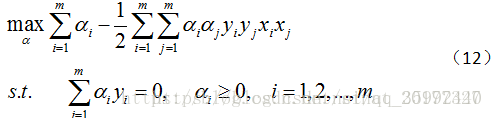


关于拉格朗日和KKT条件，[参考2](https://www.cnblogs.com/liaohuiqiang/p/7805954.html)

### 软间隔

#### 引入松弛变量

可以考虑对每个样本引入一个松弛变量$\epsilon_i$，使其变换为线性可分，同时应将其代价函数加上一个惩罚项

代价函数：


$min\frac1{2}||W||^2+C \sum_{i=1}^m \epsilon_i$ $\leftarrow$ $l_1正则化$  
$\qquad$ $s.t.$ $\qquad$ ${y_i}(W^Tx_i+b) \geq 1-\epsilon_i $  $\qquad$ C是用来平衡前后两项的比例


$min\frac1{2}||W||^2+C \sum_{i=1}^m \epsilon_i^2$ $\leftarrow$ $l_2正则化$  

对偶问题：

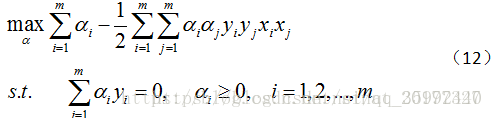

#### 核函数

对于软间隔问题，除了引入松弛变量外，还可考虑将非线性可分的数据通过**非线性变换**转换为线性可分

对偶问题的目标函数中，$(x_i\cdot y_i)$ 可以用核函数 $K(x_i,y_i)=\phi(x_i)\cdot \phi(y_i)$ 来替代，此时目标函数为：
$$\max_{\alpha}\sum_{i=1}^m \alpha_i-\frac1{2}\sum_{i=1}^m \sum_{j=1}^m \alpha_i\alpha_jy_iy_jK(x_i,x_j)$$

学习是隐式的在特征空间中进行的，不需要显示的定义特征空间和映射函数

这里的$K(x_i,x_j)$为正定核的充要条件是：K对应的grama矩阵是半正定的   
grama矩阵是向量内积所组成的矩阵

常用核函数：  
1. 多项式核
    
2. 高斯核$K(x_i,x_j)=e^{-\frac{||x_i-x_j||^2}{2 \sigma}}$


3. sigmod核

高斯核又常被称为径向基（rbf）

## svm回归

类似于分类，但其本质是使得间隔尽可能的小

# sklearn封装的SVM

## 分类

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) 和 [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) 能在数据集中实现多元分类.

SVC使用$l_2正则化$  
NuSVC与SVC类似，但使用参数来控制支持向量的数量  
 LinearSVC 是另一个实现线性核函数的支持向量分类. 记住 LinearSVC 不接受关键词 kernel, 因为它被假设为线性的. 它也缺少一些 SVC 和 NuSVC 的成员(members) 比如 support_ .

In [2]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y) 

C:\Users\yep\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
clf.predict([[2.,2.]])

array([1])

In [5]:
clf.support_vectors_
 # 获得支持向量

array([[0., 0.],
       [1., 1.]])

In [6]:
# 获得支持向量的索引
clf.support_

array([0, 1])

In [7]:
# 为每一个类别获得支持向量的数量
clf.n_support_

array([1, 1])

In [8]:
clf1=svm.LinearSVC()
clf1.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
clf1.coef_

array([[0.58823254, 0.58823254]])

In [10]:
clf1.intercept_

array([-0.47058915])

对多项式核而言，可以考虑使用ploynaimalfeature和LinearSVC并使用 piple的方法组合，也可使用SVC并将 Kernel 赋值为‘ploy’

## 回归

 [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) 和 [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR), [NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR)

回归是找到一个区间使支持向量到区间边界点的距离尽可能的小，就是找到一个区间使样本尽可能的落下区间内

[自定义核函数](https://sklearn.apachecn.org/#/docs/5?id=_14611-%e4%bd%bf%e7%94%a8-python-%e5%87%bd%e6%95%b0%e4%bd%9c%e4%b8%ba%e5%86%85%e6%a0%b8)

In [11]:
import numpy as np
from sklearn import svm
def my_kernel(X, Y):
    return np.dot(X, Y.T)
clf = svm.SVC(kernel=my_kernel)